In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

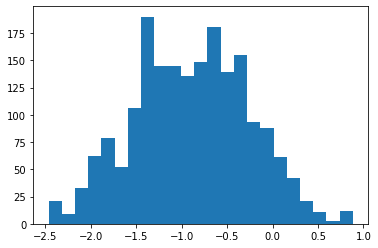

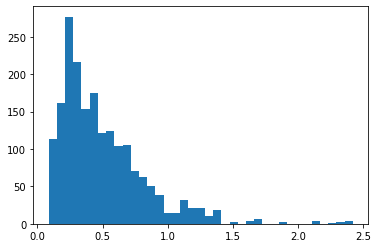

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ln_bp,ln_glucose,ln_bmi,ln_skin,ln_dpf
0,2,138,62,35,0,33.6,0.127,47,1,4.127134,4.927254,3.514526,3.555348,-2.063568
1,0,84,82,31,125,38.2,0.233,23,0,4.406719,4.430817,3.642836,3.433987,-1.456717
3,0,135,68,42,250,42.3,0.365,24,1,4.219508,4.905275,3.744787,3.737670,-1.007858
4,1,139,62,41,480,40.7,0.536,21,0,4.127134,4.934474,3.706228,3.713572,-0.623621
5,0,173,78,32,265,46.5,1.159,58,0,4.356709,5.153292,3.839452,3.465736,0.147558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1,4.304065,5.135798,3.784190,3.433987,-0.908819
763,10,101,76,48,180,32.9,0.171,63,0,4.330733,4.615121,3.493473,3.871201,-1.766092
764,2,122,70,27,0,36.8,0.340,27,0,4.248495,4.804021,3.605498,3.295837,-1.078810
765,5,121,72,23,112,26.2,0.245,30,0,4.276666,4.795791,3.265759,3.135494,-1.406497


In [49]:
diabetes_df = pd.read_csv(Path('diabetes-dataset.csv'))
pimaData_df = pd.read_csv(Path('diabetes_PIMA_INDIANS.csv'))
# plt.hist(diabetes_df[''])
# diabetes_df
diabetes_df = pd.DataFrame(diabetes_df)
pimaData_df = pd.DataFrame(pimaData_df)
merged_diabetes_df = pd.concat([diabetes_df, pimaData_df])
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['BloodPressure'] != 0]
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['Glucose'] != 0]
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['BMI'] != 0]
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['SkinThickness'] != 0]


bp = merged_diabetes_df['BloodPressure']
glucose = merged_diabetes_df['Glucose']
bmi = merged_diabetes_df['BMI']
age = merged_diabetes_df['Age']
skin_thickness = merged_diabetes_df['SkinThickness']
dpf = merged_diabetes_df['DiabetesPedigreeFunction']

merged_diabetes_df['ln_bp'] = np.log(bp)
merged_diabetes_df['ln_glucose'] = np.log(glucose)
merged_diabetes_df['ln_bmi'] = np.log(bmi)
merged_diabetes_df['ln_skin'] = np.log(skin_thickness)
merged_diabetes_df['ln_dpf'] = np.log(dpf)

plt.hist(merged_diabetes_df['ln_dpf'], bins='auto')
plt.show()
plt.hist(dpf, bins='auto')
plt.show()



In [53]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
X = merged_diabetes_df[['ln_bp', 'ln_glucose', 'ln_bmi', 'ln_skin', 'ln_dpf' ]]
y = merged_diabetes_df['Outcome']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)
# fact_df = merged_diabetes_df.drop('Outcome', axis = 1)
# outcome_df = merged_diabetes_df.Outcome

# X = fact_df
# y = outcome_df
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)

# classifier = LogisticRegression()
# classifier.fit(X_train, y_train)

# train1 = classifier.score(X_train, y_train)
# test1 = classifier.score(X_test, y_test)

# print(f'training score = {train1}')
# print(f'testing score = {test1}')



[0.14690869 0.78777203 0.25026754 0.08121834 0.10741898]


In [4]:
factors_df = diabetes_df.drop('Outcome', axis = 1)
#Ind_df = pd.get_dummies(Independent_df)
factors_df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [5]:
diab_out_df = diabetes_df.Outcome
diab_out_df.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [6]:
# Split into train and test data:
X = factors_df
y = diab_out_df

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier2 = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Logistic Regression Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Logistic Regression Testing Data Score: {classifier.score(X_test, y_test)}")

Logistic Regression Training Data Score: 0.7926666666666666
Logistic Regression Testing Data Score: 0.734


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=18, n_estimators=500).fit(X_train, y_train)
print(f'Random Forest Training Score: {clf.score(X_train, y_train)}')
print(f'Random Forest Testing Score: {clf.score(X_test, y_test)}')

Random Forest Training Score: 1.0
Random Forest Testing Score: 0.974


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
classifier2.fit(X_train_scaled, y_train)
print(f"Logistic Regression Scaled Training Data Score: {classifier2.score(X_train_scaled, y_train)}")
print(f"Logistic Regression Scaled Testing Data Score: {classifier2.score(X_test_scaled, y_test)}")

Logistic Regression Scaled Training Data Score: 0.7913333333333333
Logistic Regression Scaled Testing Data Score: 0.736


In [11]:
clf2 = RandomForestClassifier(random_state=18, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Random Forest Scaled Training Score: {clf2.score(X_train_scaled, y_train)}')
print(f'Random Forest Scaled Testing Score: {clf2.score(X_test_scaled, y_test)}')

Random Forest Scaled Training Score: 1.0
Random Forest Scaled Testing Score: 0.974


###  No Difference between scaled and unscaled data!